# Capstone Project for the IBM Data Science Professional Certificate 
## The Battle of the Neighborhoods
### Analysing locations for a clothing Store in New York City evaluated with a criteria matrix


This Notebook is for the capstone project of the 9-course specialisation in data science of IBM 
https://www.coursera.org/professional-certificates/ibm-data-science

This project will solve a problem by applying data science methods with location data fetched from FourSquare API. The Notebook will guide you through the whole process of solving the business problem.

## Table of contents
* 1 [Introduction: Business Problem](#introduction)
* 2 [Data](#data)
* 3 [Methodology](#methodology)
* 4 [Analysis](#analysis)
* 5 [Results and Discussion](#results)
* 6 [Conclusion](#conclusion)

In [354]:
# Installing and importing the necessary tools:

'''!pip install geopy 
!pip install folium
!pip install geopandas
!pip install descartes
!pip install xlrd
!pip install lxml
!pip install seaborn
!pip install matplotlib==3.1.2
!pip install matplotlib-venn'''

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
 
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import xlrd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.dpi'] = 200
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import geopandas
import descartes
from bs4 import BeautifulSoup
import csv
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print("Libraries imported")

Libraries imported


## Business Problem <a name="introduction"></a>

### 1. Introduction: 

A Canadian Investor who recently made a fortune with an investment in a Clothing Store in Toronto wants to repeat his idea in New York. New York is one of America brightest Citys and among the worlds major commercial, financial and cultural centers. Who ever has come to New York is under the spell of the atmosphere and the vibrant life of this city. Its iconic sites include skyscrapers such as the Empire State building, the Central Park, the Rockefeller Center and the Broadway Theatre located at Times Square, it is for sure a touristic hotspot in North America. With a expertly planned transport system which can take you everywhere in the city and booming business at every corner this city offers a great opportunity for the investor to open a successful clothing store but as being foreigner, he has not much idea of the structure of the gigantic City, therefore he needs some help with  his ideas in his mind, so he pointed out the following criteria for the location to be successful:

1. It should be one of the most crowded boroughs with high employment rate and good average income, because the Brand is pretty expansive and the investor wants not only tourists to buy in the store he also prefers regular customers.


2. As close to the city center or other touristic hotspots to benefit from walk-in customers. Approximately 20 Minutes walking distance to the center of the area. If possible far away from other clothing stores.


3. A location close to Italian Restaurants is preferred, because of the origin of his brand and it could be possible that people stop by and buy some clothe before or after dinner or just for window shopping.


4. As close as possible to Hotels, because guests of the city Hotels are more likely to buy clothes nearby and guarantee for more walk-in customers.


5. A very important point for the Investor is a low crime rate and a high community trust to feel safe, because he wants to move to NYC close by the store. Furthermore he mentioned that he enjoys to live close to Parks, Theatres and Art Galleries.


### 1.1. Business Problem Understanding

The Project seems very clear, find the perfect location for a italian brand clothing store and a place to live where you feel safe in New York City. For the best result the analytical solution to the business problem is to quantify and evaluate the thoguhts of the client to fullfill his requirements completly. For evaluating his criteria we will create a features weight matrix to express the investors desires in a scientific way. 

### 1.2. Analytical Approach 

First of all we need to quantify and evaluate the criteria given by the investor. 
To quantify his wishes we would express 20 minutes walking distance in 1500 meters.
As mentioned before the criteria Matrix plays a crucial role in this project to weight the interest of the client properly we will evaluate his desires with the criteria matrix. Normalize the features and multiplay it with our customer data frame to add a extra column with the weighted result which gives us an indication of the best neighborhood.


complementary to that we will use the unsupervised machiene learning method k-means to create clusters which will show us reasonable neighborhoods  to fit the interest of the client and to compare similarity between these neighborhoods. So we can support the previously result with a folium map and visualize the data. So the investor can see the results on the map and compare diffrent areas by clicking. The final DataFrame will be like a heatmap for better understanding of the diffrent information of the values.


## 2. Data  <a name="data"></a>

### 2.1. Data requirements

To ensure the best location for the store i decided to add some more complexity to the standard course problem. As you can see from the criteria given by the investor we need some more data like socioeconomic information and the crime rate and trust rate to perform this analysis. For the socio-economic data we will build a data frame with all necessary information inclusive the crime and trust rate.

The venue data will be fetched with the Foursquare Api and sorted by frequency furthermore we will filter all the relevant venues to present the investor a result which matters for his requirements. 

We will try to use representive data from official sources.





### 2.2.  Data collection

In the beginnign of the Project i found data from many different data sources, but decided to get the data from  cccnewyork.org because the Source of their Data is: U.S. Census Bureau and the data was fatched by the American Community Survey https://data.census.gov/. So i can be sure the data is up to date and reliable. 

-  Neigborhoods and Population: https://data.cccnewyork.org/data/table/66/median-incomes#66/107/40/a/a

- Unemployment: https://data.cccnewyork.org/data/map/85/unemployment-rate#85/a/3/131/40/a/a

- Income: https://data.cccnewyork.org/data/table/66/median-incomes#66/107/40/a/a 

- Crime: https://data.cccnewyork.org/data/map/1298/reported-felonies#1298/232/3/1516/40/a/a

- Trust: https://data.cccnewyork.org/data/map/1312/community-trust#1312/a/3/1531/41/a/a


- For the venues we will fetche the data with the Foursqaure Api.


- with the geocoder we can easily get the lat and long to the community district names.


### 2.3 Data understanding and preparing
First we will try to build a clean dataframe with all the socio-economic data we found as csv files. Than we will add the lat and long and do a quicl plot for a better overview of the City and the Community Districts.

The second dataframe will be the district venue data. Therefore we will fetch the venue data of the community districts with the foursquare api. We will explore the venues to get a better feeling of the boroughs. We will use One-hot-encoding to compare the districts and the venues and get the frequency of each venue in each district and transform the dataframe in kind of a heatmap dataframe.  We will use some plotting to understand the distribution of the venue "Clothing Store" and "Boutique" better but you can easily change the variable to plot any venue. 

### 2.4. Building the socio economic dataframe

In [ ]:
import sys
import pandas as pd
from geopy.geocoders import Nominatim

import folium
import json
import numpy as np

import requests
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#print(sys.path)

### 2.4.1 loading and cleaning the diffrent csv's

#### loading and cleaning the population csv

In [ ]:
population = pd.read_csv("ny_data/ny_pop.csv", sep = ",",skiprows=4)
population.head()

In [ ]:
population = population[population["TimeFrame"] == 2018] # selecting the newest data 
population.drop(columns=["Fips","DataFormat","TimeFrame"],inplace=True) #deleting unecessary data
population.rename(columns = {"Location":"Area", "Data": "Population"},inplace=True)
population,population_boroughs, zipcodes = population[:59], population[59:65],population[107:] # splitting data 
population = population.sort_values(by=["Area"]) #sort by Area for better overview and to compare with other data
population.reset_index(drop = True,inplace=True) #setting new index
population.index.names = ["Index"]

In [ ]:
print(population.shape)
population.head()

#### loading and cleaning the income csv

In [ ]:
income = pd.read_csv("ny_data/ny_median_income.csv",sep = ",",skiprows = 4)
income.head()

In [11]:
income = income[income["TimeFrame"]== 2018]  # selecting the newest data 
income = income[income["Household Type"] =="All Households"]  # selecting data 
income.drop(columns=["Fips","DataFormat","Household Type","TimeFrame"],inplace=True) #deleting unecessary data
income.rename(columns = {"Location":"Area", "Data": "Income","TimeFrame": "Year"},inplace=True)
income_boroughs = pd.DataFrame(income, index =[52, 56, 839, 1512,2631,3416]) #creating boroughs frame 
income.drop(index= 52, inplace= True) #deleting unecessary data
income.drop(index= 56, inplace= True)
income.drop(index= 839, inplace= True)
income.drop(index= 1512, inplace= True)
income.drop(index= 2631, inplace= True)
income.drop(index= 3416, inplace= True)
income = income.sort_values(by=["Area"])
income.reset_index(drop = True,inplace=True) #setting index
income.index.names= ["Index"]

In [12]:
#check shape of frame to compare with the other frames
print(income.shape)
income.head()

(59, 2)


Area    Income
Index                                
0                   Astoria   67444.0
1      Battery Park/Tribeca  148152.0
2                 Bay Ridge   72402.0
3                   Bayside   86338.0
4              Bedford Park   34349.0

####  loading and clean the employment csv

In [15]:
employment = pd.read_csv("ny_data/ny_unemployment.csv",sep = ",",skiprows = 4)
employment = employment[employment["TimeFrame"]==2018] #selecting the newest data 
employment.drop(columns=["DataFormat", "Fips", "TimeFrame"], inplace = True) #delete unecessary data
employment.rename(columns = {"Location": "Area", "Data": "Unemployment in %"},inplace=True)

In [16]:
employment, employment_boroughs = employment[:59], employment[59:] #split frames

In [17]:
employment = employment.sort_values(by=["Area"]) #setting index
employment.reset_index(drop = True,inplace=True)
employment.index.names= ["Index"]

In [18]:
print(employment.shape)
employment.head()

(59, 2)


Area  Unemployment in %
Index                                         
0                   Astoria              0.044
1      Battery Park/Tribeca              0.037
2                 Bay Ridge              0.036
3                   Bayside              0.035
4              Bedford Park              0.098

#### loading and clean the felonies data

In [21]:
felonies = pd.read_csv("ny_data/ny_repfelonies.csv",sep = ",",skiprows = 4)
felonies.head()

Location      Offense Type  TimeFrame DataFormat   Data  \
0       Battery Park/Tribeca  Violent Felonies       2009     Number  191.0   
1          Greenwich Village  Violent Felonies       2009     Number  393.0   
2            Lower East Side  Violent Felonies       2009     Number  768.0   
3            Chelsea/Clinton  Violent Felonies       2009     Number  477.0   
4  Midtown Business District  Violent Felonies       2009     Number  556.0   

   Fips  
0   101  
1   102  
2   103  
3   104  
4   105

In [22]:
felonies = felonies[felonies["TimeFrame"] == 2018]
felonies.drop(columns=["DataFormat", "Fips", "TimeFrame", "Offense Type"], inplace = True)
felonies.rename(columns = {"Location": "Area", "Data": "Felonies"},inplace=True)

In [23]:
felonies, felonies_boroughs = felonies[:59], felonies[59:65]

In [24]:
felonies = felonies.sort_values(by=["Area"])
felonies.reset_index(drop = True,inplace=True)
felonies.index.names= ["Index"]

In [25]:
print(felonies.shape)
felonies.head()

(59, 2)


Area  Felonies
Index                                
0                   Astoria     769.0
1      Battery Park/Tribeca     143.0
2                 Bay Ridge     192.0
3                   Bayside     110.0
4              Bedford Park     881.0

####  loading and clean the trust csv

In [28]:
trust = pd.read_csv("ny_data/ny_trust.csv", sep = ",", skiprows=4)
trust.head(7)

Location TimeFrame DataFormat  Data     Fips
0         New York City   2015/16    Percent  0.72  3651000
1             Manhattan   2015/16    Percent  0.70    36061
2                 Bronx   2015/16    Percent  0.67    36005
3              Brooklyn   2015/16    Percent  0.73    36047
4                Queens   2015/16    Percent  0.73    36081
5         Staten Island   2015/16    Percent  0.83    36085
6  Battery Park/Tribeca   2015/16    Percent  0.70      101

In [29]:
trust.rename(columns = {"Location": "Area","Data": "Trust in %"},inplace=True)
trust.drop(columns = ["TimeFrame", "DataFormat", "Fips"],inplace = True)
trust, trust_boroughs = trust[6:],trust[0:6]
trust = trust.sort_values(by=["Area"])
trust.reset_index(drop = True,inplace=True)
trust.index.names= ["Index"]

In [30]:
print(trust.shape)
trust.head()

(59, 2)


Area  Trust in %
Index                                  
0                   Astoria        0.73
1      Battery Park/Tribeca        0.70
2                 Bay Ridge        0.74
3                   Bayside        0.86
4              Bedford Park        0.63

### 2.4.2 Merge the diffrent dataframes together

In [33]:
# socio = df1.merge(df2, on="City or Index")
# socio = socio.merge(df3, on="City or Index")
socio = pd.concat([population ,income ,employment ,felonies, trust],axis = 1)
socio.head()

Area   Population                  Area    Income  \
Index                                                                      
0                   Astoria  160871.0000               Astoria   67444.0   
1      Battery Park/Tribeca   61375.7862  Battery Park/Tribeca  148152.0   
2                 Bay Ridge  125200.0000             Bay Ridge   72402.0   
3                   Bayside  115744.0000               Bayside   86338.0   
4              Bedford Park  133784.0000          Bedford Park   34349.0   

                       Area  Unemployment in %                  Area  \
Index                                                                  
0                   Astoria              0.044               Astoria   
1      Battery Park/Tribeca              0.037  Battery Park/Tribeca   
2                 Bay Ridge              0.036             Bay Ridge   
3                   Bayside              0.035               Bayside   
4              Bedford Park              0.098          Bedford Park   

       Felonies                  Area  Trust in %  
Index                                              
0         769.0               Astoria        0.73  
1         143.0  Battery Park/Tribeca        0.70  
2         192.0             Bay Ridge        0.74  
3         110.0               Bayside        0.86  
4         881.0          Bedford Park        0.63

In [34]:
#delete the duplicated "Area" columns

socio = socio.loc[:,~socio.columns.duplicated()]

#df.columns.duplicated() returns boolean array true/false 
#df.loc[:,[]]slects only non duplicated columns
#result = socio["Population", "Income", "Unemployment in %", "Felonies", "Trust in %"]

In [35]:
print(socio.shape)
socio.head()

(59, 6)


Area   Population    Income  Unemployment in %  \
Index                                                                   
0                   Astoria  160871.0000   67444.0              0.044   
1      Battery Park/Tribeca   61375.7862  148152.0              0.037   
2                 Bay Ridge  125200.0000   72402.0              0.036   
3                   Bayside  115744.0000   86338.0              0.035   
4              Bedford Park  133784.0000   34349.0              0.098   

       Felonies  Trust in %  
Index                        
0         769.0        0.73  
1         143.0        0.70  
2         192.0        0.74  
3         110.0        0.86  
4         881.0        0.63

### 2.4.3 Preparing the DataFrame for geopy 

In [39]:
#Splitting the names of the column Area and keeping the first Name of the Community District to ensure 
#geolocator can find al lat and long because there were severel names it couldn´t find. 

newArea = socio.Area.str.split("/", n = 1, expand = True )
#socio["Area"] = socio["Area"].str.split("/")
socio["Area"] = newArea[0]

In [40]:
#Adding "New York City" for finding the correct lat and long for the community districts 
#and only get results in New York City

socio_test = socio.copy()
socio_test["Area"] = socio_test["Area"].apply(lambda x: "{}{}".format(x, " New York City"))
#df['col'] = 'str' + df['col'].astype(str)


In [41]:
#manuell cleaning for the last problem by finding the correct lat and long

socio_test["Area"][33] = "Midtown"

/Users/patr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 2.4.4 Adding Latitude and Longitude to the DataFrame

In [42]:
#Community Districts
geolocator = Nominatim(user_agent="to_explorer")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
#geocode = lambda query: geolocator.geocode("%s, New York City NY" % query)
#location = geocoder.geocode(query=str(zip_code),components={"country": "PK","locality":"lahore"})

#Iterate Geocode

N_lat = []
N_long = []

for neighborhood in socio_test["Area"]:
    
    location = geolocator.geocode(neighborhood)
    if location:
        n_latitude = location.latitude
        n_longitude = location.longitude
        N_lat.append(n_latitude)
        N_long.append(n_longitude)
    else: 
        print(neighborhood)

In [ ]:
# Creating latlong csv for easy use of latlong without fetching

latlong_df = pd.DataFrame({"Area": socio["Area"],"N_lat" : N_lat, "N_long" : N_long })
latlong_df.to_csv('latlong.csv', index=False)

In [46]:
#Compare result with length of index

print(len(N_lat),len(N_long))

59 59


In [47]:
#Append to df

socio["N_lat"] = N_lat
socio["N_long"] = N_long

In [48]:
socio.head()

Area   Population    Income  Unemployment in %  Felonies  \
Index                                                                     
0           Astoria  160871.0000   67444.0              0.044     769.0   
1      Battery Park   61375.7862  148152.0              0.037     143.0   
2         Bay Ridge  125200.0000   72402.0              0.036     192.0   
3           Bayside  115744.0000   86338.0              0.035     110.0   
4      Bedford Park  133784.0000   34349.0              0.098     881.0   

       Trust in %      N_lat     N_long  
Index                                    
0            0.73  40.772014 -73.930267  
1            0.70  40.703012 -74.015825  
2            0.74  40.633993 -74.014584  
3            0.86  40.768435 -73.777077  
4            0.63  40.870100 -73.885691

In [49]:
#checking data types
socio.dtypes

Area                  object
Population           float64
Income               float64
Unemployment in %    float64
Felonies             float64
Trust in %           float64
N_lat                float64
N_long               float64
dtype: object

### 2.5 Mapping with folium 

In [62]:
# Lets create the map of NYC using latitude and longitude values for all the Community Districts
# Create the map located in New York City
map_NY_N = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# for each Community District add a marker to map
for lat, long, neighborhoud in zip(socio['N_lat'], socio['N_long'], socio['Area']):
    label = '{}'.format(neighborhoud)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=15,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY_N) 
    
map_NY_N

### 2.6 Getting the Venue Data of the Districts

We will fetch the venues data of the districts with the Foursquare Api to explore the Districts venues structure

In [63]:
# define Foursquare Credentials and Version

CLIENT_ID = 'RB4WGP3TF2CDZNPG1TDRMV21LAUIGXBJSE5OPYVSDV5C102Y' # your Foursquare ID
CLIENT_SECRET = 'E1MWJHM1OONRUPDCSKYMF5JHGALVQEBLHN3HF34DDGO0GUTZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

radius = 1500 #"20 Minutes walking distance to District Center" 
LIMIT = 300 
search_query = 'venues'

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat,  
    long, 
    radius, 
    LIMIT)

In [64]:
# get 100 venues with a radius of 1500m to Community District
venues = []

for lat, long, Area in zip(socio['N_lat'], socio["N_long"], socio["Area"]):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            Area,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
        


### 2.6.1 Create venue data frame

In [65]:
# define the column names
columns_names = ["Area", 'N_lat', 'N_long', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues, columns=columns_names)

print(venues_df.shape)
venues_df.head()

(5409, 7)


Area      N_lat     N_long                          VenueName  \
0  Astoria  40.772014 -73.930267               Welling Court Murals   
1  Astoria  40.772014 -73.930267         Vesta Trattoria & Wine Bar   
2  Astoria  40.772014 -73.930267                      Astoria Craft   
3  Astoria  40.772014 -73.930267  Chateau Le Woof Pet Market & Cafe   
4  Astoria  40.772014 -73.930267                       Infinitea NY   

   VenueLatitude  VenueLongitude       VenueCategory  
0      40.771526      -73.931513          Street Art  
1      40.769809      -73.927796  Italian Restaurant  
2      40.773284      -73.927286                 Bar  
3      40.768984      -73.935622                Café  
4      40.771669      -73.924006     Bubble Tea Shop

### 2.6.2 Create csv file for easy access 

In [68]:
venues_df.to_csv("NYC_venues")

In [69]:
nyc_venues = pd.read_csv("NYC_venues") 
nyc_venues.drop(["N_lat","N_long","Unnamed: 0"], axis=1, inplace=True)
nyc_venues.head()

Area                          VenueName  VenueLatitude  VenueLongitude  \
0  Astoria               Welling Court Murals      40.771526      -73.931513   
1  Astoria         Vesta Trattoria & Wine Bar      40.769809      -73.927796   
2  Astoria                      Astoria Craft      40.773284      -73.927286   
3  Astoria  Chateau Le Woof Pet Market & Cafe      40.768984      -73.935622   
4  Astoria                       Infinitea NY      40.771669      -73.924006   

        VenueCategory  
0          Street Art  
1  Italian Restaurant  
2                 Bar  
3                Café  
4     Bubble Tea Shop

### 2.6.3 Venue exploring

In [70]:
print("There are {} uniques categories.".format(len(nyc_venues["VenueCategory"].unique())))

There are 372 uniques categories.


In [71]:
nyc_venues["VenueCategory"].unique()

array(['Street Art', 'Italian Restaurant', 'Bar', 'Café',
       'Bubble Tea Shop', 'Track',
       'Residential Building (Apartment / Condo)', 'Scenic Lookout',
       'Park', 'Sculpture Garden', 'Deli / Bodega', 'Art Museum',
       'Mexican Restaurant', 'Pizza Place', 'Coffee Shop', 'Gourmet Shop',
       'Breakfast Spot', 'Bakery', 'Pub', 'Gym', 'Greek Restaurant',
       'Grocery Store', 'Souvlaki Shop', 'Taco Place', 'Food Truck',
       'Diner', 'Bookstore', 'Playground', 'Japanese Restaurant',
       'Dog Run', 'Brazilian Restaurant', 'Plaza', 'Ice Cream Shop',
       'Indian Restaurant', 'Monument / Landmark', 'Dessert Shop',
       'Ramen Restaurant', 'Flower Shop', 'Food & Drink Shop', 'Spa',
       'Middle Eastern Restaurant', 'Thai Restaurant', 'Sandwich Place',
       'Beer Garden', 'Burger Joint', 'Health & Beauty Service',
       'Smoke Shop', 'Yoga Studio', 'American Restaurant', 'Gift Shop',
       'Vegetarian / Vegan Restaurant', 'Seafood Restaurant',
       'Warehou

In [73]:
# The result shows us the limitation of 100 venues of the free Foursquare API 
nyc_venues.groupby(["Area"]).count().head()

VenueName  VenueLatitude  VenueLongitude  VenueCategory
Area                                                                 
Astoria             100            100             100            100
Battery Park        100            100             100            100
Bay Ridge           100            100             100            100
Bayside             100            100             100            100
Bedford Park        100            100             100            100

### 2.6.4 One hot encoding for analysing the venues of each district 

#### and more venue & district exploring

In [74]:
# one hot encoding to quantify the venues
nyc_onehot = pd.get_dummies(nyc_venues[['VenueCategory']], prefix="", prefix_sep="")
nyc_onehot['Area'] = nyc_venues['Area'] 


# move Area to the first column
fixed_columns = list(nyc_onehot.columns[-1:]) + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

print(nyc_onehot.shape)
nyc_onehot.head()

(5409, 373)


Area  Accessories Store  Afghan Restaurant  African Restaurant  \
0  Astoria                  0                  0                   0   
1  Astoria                  0                  0                   0   
2  Astoria                  0                  0                   0   
3  Astoria                  0                  0                   0   
4  Astoria                  0                  0                   0   

   American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                    0             0         0       0                 0   
1                    0             0         0       0                 0   
2                    0             0         0       0                 0   
3                    0             0         0       0                 0   
4                    0             0         0       0                 0   

   Argentinian Restaurant  ...  Whisky Bar  Wine Bar  Wine Shop  Winery  \
0                       0  ...           0         0          0       0   
1                       0  ...           0         0          0       0   
2                       0  ...           0         0          0       0   
3                       0  ...           0         0          0       0   
4                       0  ...           0         0          0       0   

   Wings Joint  Women's Store  Yemeni Restaurant  Yoga Studio  Zoo  \
0            0              0                  0            0    0   
1            0              0                  0            0    0   
2            0              0                  0            0    0   
3            0              0                  0            0    0   
4            0              0                  0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 373 columns]

In [75]:
# group frame by Area
nyc_grouped = nyc_onehot.groupby(["Area"]).mean().reset_index().round(decimals =3)

print(nyc_grouped.shape)
nyc_grouped

(59, 373)


Area  Accessories Store  Afghan Restaurant  \
0                     Astoria               0.00               0.00   
1                Battery Park               0.00               0.00   
2                   Bay Ridge               0.00               0.00   
3                     Bayside               0.00               0.00   
4                Bedford Park               0.00               0.00   
5          Bedford Stuyvesant               0.00               0.00   
6                 Bensonhurst               0.00               0.00   
7                Borough Park               0.00               0.00   
8                 Brownsville               0.00               0.00   
9                    Bushwick               0.00               0.00   
10                   Canarsie               0.00               0.00   
11             Central Harlem               0.00               0.00   
12                    Chelsea               0.00               0.00   
13                  Concourse               0.00               0.00   
14               Coney Island               0.00               0.00   
15        Crown Heights North               0.00               0.00   
16        Crown Heights South               0.00               0.00   
17              East Flatbush               0.00               0.00   
18                East Harlem               0.00               0.00   
19              East New York               0.00               0.00   
20               East Tremont               0.00               0.00   
21                   Elmhurst               0.00               0.00   
22                   Flatbush               0.00               0.00   
23                   Flushing               0.00               0.00   
24                Fort Greene               0.00               0.00   
25              Fresh Meadows               0.00               0.01   
26          Greenwich Village               0.00               0.00   
27               Howard Beach               0.00               0.00   
28                Hunts Point               0.00               0.00   
29            Jackson Heights               0.00               0.00   
30                    Jamaica               0.00               0.00   
31            Lower East Side               0.00               0.00   
32             Manhattanville               0.00               0.00   
33  Midtown Business District               0.00               0.00   
34                 Morrisania               0.00               0.00   
35                 Mott Haven               0.00               0.00   
36                Murray Hill               0.00               0.00   
37                 Park Slope               0.01               0.00   
38             Pelham Parkway               0.00               0.00   
39             Queens Village               0.00               0.00   
40                  Rego Park               0.00               0.00   
41                  Ridgewood               0.00               0.00   
42                  Riverdale               0.00               0.00   
43             Sheepshead Bay               0.00               0.00   
44                South Beach               0.00               0.00   
45                 St. George               0.00               0.00   
46                  Sunnyside               0.00               0.00   
47                Sunset Park               0.00               0.00   
48              The Rockaways               0.00               0.00   
49                Throgs Neck               0.00               0.00   
50                Tottenville               0.00               0.00   
51                  Unionport               0.00               0.00   
52         University Heights               0.00               0.00   
53            Upper East Side               0.00               0.00   
54            Upper West Side               0.00               0.00   
55         Washington Heights               0.00 

### 2.6.5 Filter the most Common Venues

In [85]:
# Function to return the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [86]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyc_venues_sorted = pd.DataFrame(columns=columns)
nyc_venues_sorted['Area'] = nyc_grouped['Area']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

nyc_venues_sorted.head()

Area 1st Most Common Venue 2nd Most Common Venue  \
0       Astoria                   Bar      Greek Restaurant   
1  Battery Park           Coffee Shop                  Park   
2     Bay Ridge           Pizza Place            Bagel Shop   
3       Bayside      Greek Restaurant        Cosmetics Shop   
4  Bedford Park           Pizza Place                 Diner   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                  Café                  Park   
1                 Hotel           Pizza Place                  Café   
2    Mexican Restaurant                Bakery    Italian Restaurant   
3                Bakery    Italian Restaurant           Coffee Shop   
4                  Park                Garden         Deli / Bodega   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Bakery            Bagel Shop         Deli / Bodega   
1                 Plaza    Falafel Restaurant  Gym / Fitness Center   
2    Seafood Restaurant   American Restaurant                   Bar   
3           Pizza Place      Sushi Restaurant     Korean Restaurant   
4                   Gym           Coffee Shop    Mexican Restaurant   

   9th Most Common Venue 10th Most Common Venue     11th Most Common Venue  \
0                    Gym     Italian Restaurant              Grocery Store   
1          Memorial Site                    Gym             Scenic Lookout   
2  Vietnamese Restaurant         Cosmetics Shop         Turkish Restaurant   
3                    Bar    American Restaurant               Burger Joint   
4         Sandwich Place       Video Game Store  Latin American Restaurant   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0   Brazilian Restaurant        Bubble Tea Shop            Coffee Shop   
1     Mexican Restaurant           Cocktail Bar             Food Court   
2               Tea Room                   Bank             Restaurant   
3             Donut Shop                  Diner         Ice Cream Shop   
4          Grocery Store             Shoe Store             Donut Shop   

  15th Most Common Venue  
0           Burger Joint  
1       Pedestrian Plaza  
2    Szechuan Restaurant  
3      Indian Restaurant  
4         Clothing Store

### 2.6.6 Create heat map df for the most common venues

In [87]:
nyc_grouped_heat = nyc_grouped.set_index("Area").transpose()
nyc_grouped_heat.style.background_gradient(cmap="Blues", low = 0, high = 0.5)

### 2.6.7 Create heat map for Clothing Stores
to visualize the venues distribution in each Area

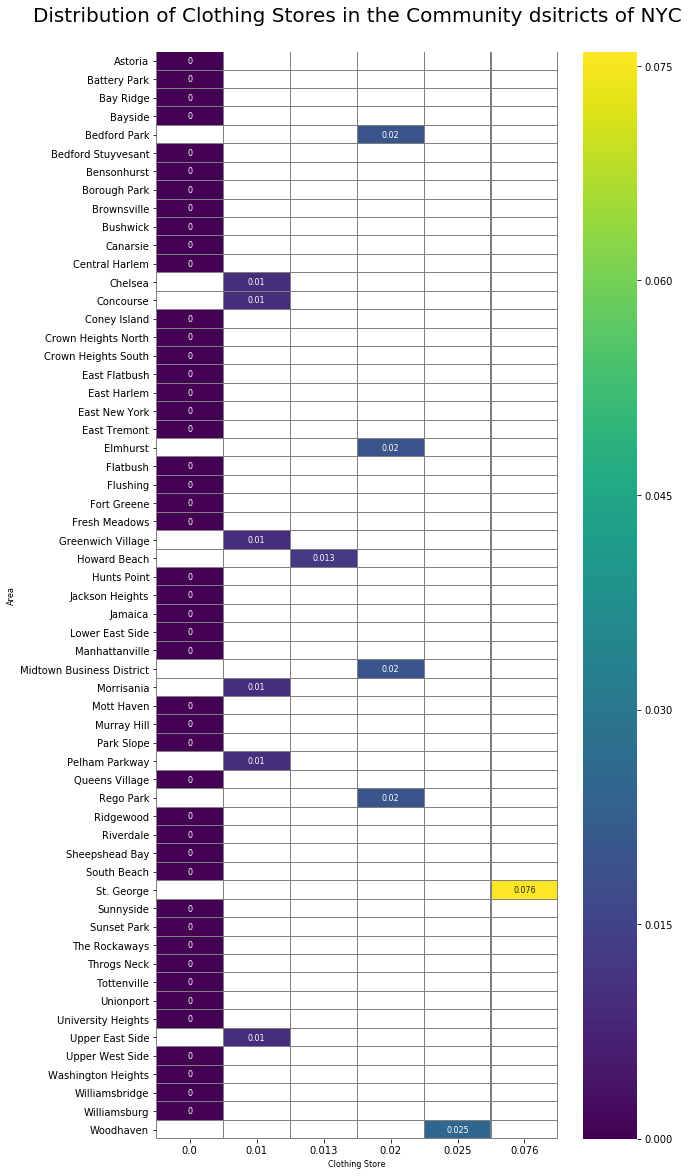

In [228]:
business  = "Clothing Store" #change string for diffrent venues

result = nyc_grouped.pivot(index="Area", columns = business, values = business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) # fontsize of the tick labels
plt.rcParams['figure.figsize'] = [9, 20]
plt.rc('figure', titlesize=20) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Clothing Stores in the Community dsitricts of NYC', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

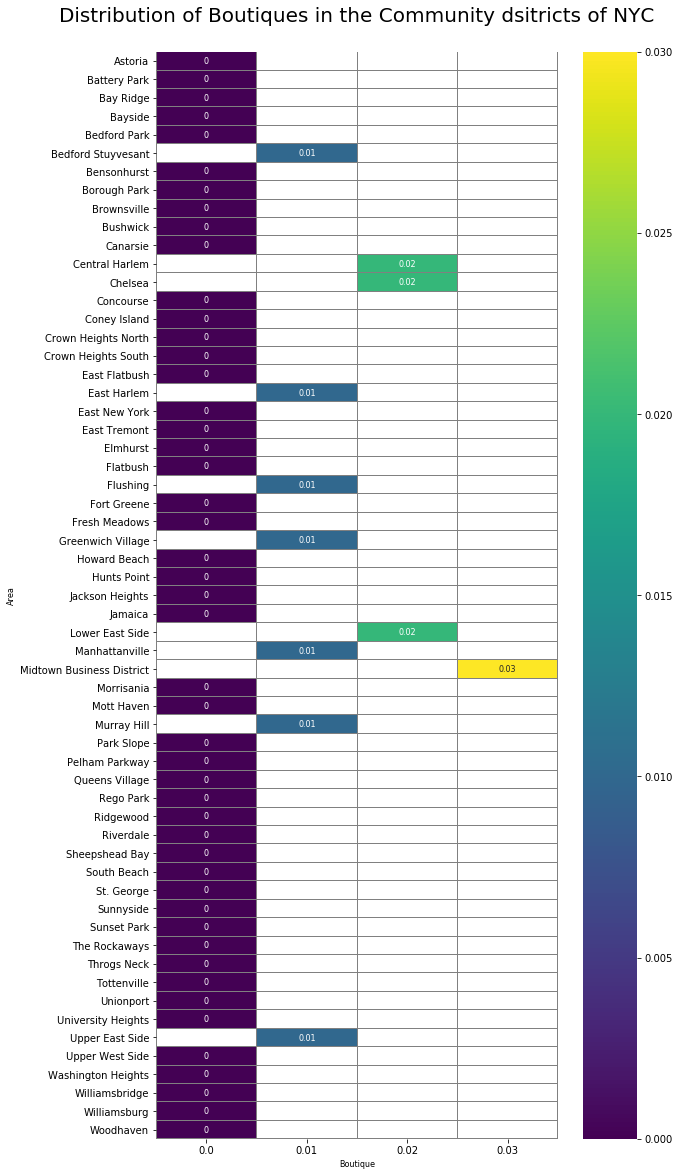

In [78]:
business  = "Boutique"
result = nyc_grouped.pivot(index="Area", columns = business, values = business)

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline

plt.rc('xtick', labelsize=10)    
plt.rc('ytick', labelsize=10) 
plt.rcParams['figure.figsize'] = [9, 20]
plt.rc('figure', titlesize=20) 
plt.rcParams.update({'font.size': 8})
plt.title('Distribution of Boutiques in the Community dsitricts of NYC', fontdict = {'fontsize' : 20}, pad=30)
sns.heatmap(result, annot=True, cmap='viridis', linewidths = 0.01 , linecolor='grey', cbar=True, fmt="g")

## 3 Methodology <a name="methodology"></a>

Now we will cluster the diffrent boroughs with the k-mean algorithm, followed by some exploring and finally map the clusters to expand our feeling for the data and understanding of the city. We will use the "elbow" method to find the perfect number of clusters. 

Then we build the features wheight criteria matrix, at this point we will only deal with data which is relevant to the customer. This means presenting the client a analysation which includes chinese restaurant, gyms etc. is irrelevant to his business problem and guides us to a wrong result. We will weight the prerequisites of the Investor in a scale from 0-1 in a manner of importance. 

Another important factor is normalization to bring our intrested features to a comparable grade. We will normalize our feature weight matrix to the numeric value between 0 and 1. For example the highest Income will be converted to 1, the highest frequency of hotels will be converted to 1 etc. so we can ensure that each feature has the same weight as the others.

Now we can multiply the criteria matrix with the customer data frame and add the total score column. The total score will give us insights of the perfect location

The next method is to combine the k-means analysation with the final dataframe to cluster the best neighborhoods in accordance to the customer requirements this supports our previously result with a folium cluster map where the customer can see similar neighborhoods annd compare them of the map and see their scores too. 




## 4 Analysis <a name="analysis"></a>

### 4.1 Clustering and mapping

#### 4.1.1 Find the optimal number of clusters 
finding the best number of clusters with the elbow method for clustering the unlabeled district data by venues. 



In [79]:
nyc_clustering = nyc_grouped.drop(["Area"], 1)

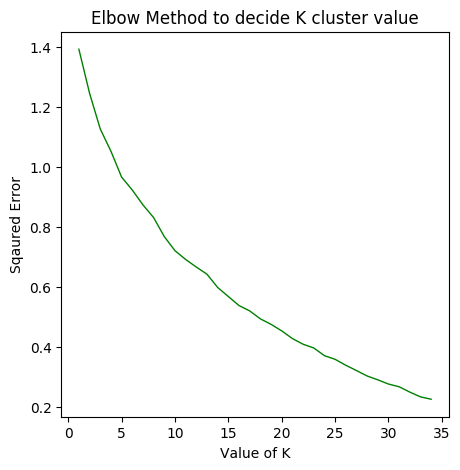

In [80]:
elbow =[] 
for i in range(1, 35): 
    KM = KMeans(n_clusters=i, max_iter = 300).fit(nyc_clustering)
    
      
    # calculates squared error 
    # for the clustered points 
    elbow.append(KM.inertia_)      
  
# plot the cost against K values 
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 10})
plt.title('Elbow Method to decide K cluster value')
plt.plot(range(1, 35), elbow, color ='g', linewidth ='1') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.show()

  
# the point of the elbow shape happens to start is the most optimal value for deciding k 

#### 4.1.2 Setting up the cluster algorithm

In [81]:
# set number of clusters
kclusters = 11

nyc_clustering = nyc_grouped.drop(["Area"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([10,  8, 10, 10,  0,  4,  3, 10,  7,  9,  7,  8,  8,  0,  0],
      dtype=int32)

In [88]:
# add clustering labels
nyc_venues_sorted.insert(0,"Cluster_Labels", kmeans.labels_)
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
nyc_merged = socio

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(nyc_venues_sorted.set_index("Area"), on="Area")

In [89]:
nyc_venues_sorted.head()

Cluster_Labels          Area 1st Most Common Venue 2nd Most Common Venue  \
0              10       Astoria                   Bar      Greek Restaurant   
1               8  Battery Park           Coffee Shop                  Park   
2              10     Bay Ridge           Pizza Place            Bagel Shop   
3              10       Bayside      Greek Restaurant        Cosmetics Shop   
4               0  Bedford Park           Pizza Place                 Diner   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                  Café                  Park   
1                 Hotel           Pizza Place                  Café   
2    Mexican Restaurant                Bakery    Italian Restaurant   
3                Bakery    Italian Restaurant           Coffee Shop   
4                  Park                Garden         Deli / Bodega   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Bakery            Bagel Shop         Deli / Bodega   
1                 Plaza    Falafel Restaurant  Gym / Fitness Center   
2    Seafood Restaurant   American Restaurant                   Bar   
3           Pizza Place      Sushi Restaurant     Korean Restaurant   
4                   Gym           Coffee Shop    Mexican Restaurant   

   9th Most Common Venue 10th Most Common Venue     11th Most Common Venue  \
0                    Gym     Italian Restaurant              Grocery Store   
1          Memorial Site                    Gym             Scenic Lookout   
2  Vietnamese Restaurant         Cosmetics Shop         Turkish Restaurant   
3                    Bar    American Restaurant               Burger Joint   
4         Sandwich Place       Video Game Store  Latin American Restaurant   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0   Brazilian Restaurant        Bubble Tea Shop            Coffee Shop   
1     Mexican Restaurant           Cocktail Bar             Food Court   
2               Tea Room                   Bank             Restaurant   
3             Donut Shop                  Diner         Ice Cream Shop   
4          Grocery Store             Shoe Store             Donut Shop   

  15th Most Common Venue  
0           Burger Joint  
1       Pedestrian Plaza  
2    Szechuan Restaurant  
3      Indian Restaurant  
4         Clothing Store

In [90]:
nyc_merged.head()

Area   Population    Income  Unemployment in %  Felonies  \
Index                                                                     
0           Astoria  160871.0000   67444.0              0.044     769.0   
1      Battery Park   61375.7862  148152.0              0.037     143.0   
2         Bay Ridge  125200.0000   72402.0              0.036     192.0   
3           Bayside  115744.0000   86338.0              0.035     110.0   
4      Bedford Park  133784.0000   34349.0              0.098     881.0   

       Trust in %      N_lat     N_long  Cluster_Labels 1st Most Common Venue  \
Index                                                                           
0            0.73  40.772014 -73.930267              10                   Bar   
1            0.70  40.703012 -74.015825               8           Coffee Shop   
2            0.74  40.633993 -74.014584              10           Pizza Place   
3            0.86  40.768435 -73.777077              10      Greek Restaurant   
4            0.63  40.870100 -73.885691               0           Pizza Place   

       ... 6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
Index  ...                                                                     
0      ...                Bakery            Bagel Shop         Deli / Bodega   
1      ...                 Plaza    Falafel Restaurant  Gym / Fitness Center   
2      ...    Seafood Restaurant   American Restaurant                   Bar   
3      ...           Pizza Place      Sushi Restaurant     Korean Restaurant   
4      ...                   Gym           Coffee Shop    Mexican Restaurant   

       9th Most Common Venue 10th Most Common Venue  \
Index                                                 
0                        Gym     Italian Restaurant   
1              Memorial Site                    Gym   
2      Vietnamese Restaurant         Cosmetics Shop   
3                        Bar    American Restaurant   
4             Sandwich Place       Video Game Store   

          11th Most Common Venue 12th Most Common Venue  \
Index                                                     
0                  Grocery Store   Brazilian Restaurant   
1                 Scenic Lookout     Mexican Restaurant   
2             Turkish Restaurant               Tea Room   
3                   Burger Joint             Donut Shop   
4      Latin American Restaurant          Grocery Store   

      13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  
Index                                                                       
0            Bubble Tea Shop            Coffee Shop           Burger Joint  
1               Cocktail Bar             Food Court       Pedestrian Plaza  
2                       Bank             Restaurant    Szechuan Restaurant  
3                      Diner         Ice Cream Shop      Indian Restaurant  
4                 Shoe Store             Donut Shop         Clothing Store  

[5 rows x 24 columns]

#### 4.1.3 Map the Clusters

In [91]:
# create map
map_clusters = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged["N_lat"], nyc_merged["N_long"], nyc_merged["Area"], nyc_merged["Cluster_Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.2 Explore the clusters

In [92]:
cluster_df = nyc_merged.groupby('Cluster_Labels')['Area'].apply(', '.join)
cluster_df.reset_index().style.hide_index()

#### 4.2.1 explore the diffrent clusters

In [94]:
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 0]
nyc_merged.loc[nyc_merged['Cluster_Labels'] == 1]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 2]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 3]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 4]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 5]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 6]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 7]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 8]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 9]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 10]

Area  Population   Income  Unemployment in %  Felonies  \
Index                                                                      
31     Lower East Side    155408.0  48376.0               0.06     611.0   

       Trust in %      N_lat     N_long  Cluster_Labels 1st Most Common Venue  \
Index                                                                           
31           0.66  40.715936 -73.986806               1        Sandwich Place   

       ... 6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
Index  ...                                                                     
31     ...             Wine Shop                Bakery          Cocktail Bar   

      9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
Index                                                                       
31                 Boutique  Australian Restaurant    Japanese Restaurant   

      12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
Index                                                                        
31                 Juice Bar     Chinese Restaurant     Italian Restaurant   

      15th Most Common Venue  
Index                         
31                       Bar  

[1 rows x 24 columns]

#### 4.2.2 Explore only the most common venues of each district in the cluster

In [97]:
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 0, nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
nyc_merged.loc[nyc_merged['Cluster_Labels'] == 1,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 2,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 3,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 4,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 5,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 6,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 7,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 8,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 9,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]
#nyc_merged.loc[nyc_merged['Cluster_Labels'] == 10,nyc_merged.columns[[0] + list(range(8, nyc_merged.shape[1]))]]


Area  Cluster_Labels 1st Most Common Venue  \
Index                                                          
31     Lower East Side               1        Sandwich Place   

      2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
Index                                                                     
31              Coffee Shop        Ice Cream Shop           Pizza Place   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
Index                                                                     
31          Thai Restaurant             Wine Shop                Bakery   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
Index                                                                      
31             Cocktail Bar              Boutique  Australian Restaurant   

      11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
Index                                                                        
31       Japanese Restaurant              Juice Bar     Chinese Restaurant   

      14th Most Common Venue 15th Most Common Venue  
Index                                                
31        Italian Restaurant                    Bar

### 4.3 Analysing the requirements with the feature weighted matrix and focusing on releveant variables

#### 4.3.1 feature weighted matrix

In [99]:
customer_requirements = [["high population" , 0.8], ["high income", 0.8], ["low unemployment ", -0.5],["low crime rate" , -0.7],
                         ["high communtiy trust" , 0.7],["away from other Boutique", -0.3],["away from other Clothing Stores", -0.3], 
                         ["close to Italian Restaurants", 0.5], ["close to Hotels", 0.9],["close to park" , 0.5] ,
                         ["close to Theater" , 0.3],["close to Art Gallery" , 0.3]]
# Create the pandas DataFrame 
weighted_matrix = pd.DataFrame(customer_requirements, columns = ['Requirement', 'Weight'])

weighted_matrix

Requirement  Weight
0                   high population     0.8
1                       high income     0.8
2                 low unemployment     -0.5
3                    low crime rate    -0.7
4              high communtiy trust     0.7
5          away from other Boutique    -0.3
6   away from other Clothing Stores    -0.3
7      close to Italian Restaurants     0.5
8                   close to Hotels     0.9
9                     close to park     0.5
10                 close to Theater     0.3
11             close to Art Gallery     0.3

#### 4.3.2 Creating the df with only relevant data

In [100]:
# Creating df for the customers relevant venues
nyc_venues_customer = nyc_grouped[["Area", "Boutique", "Clothing Store", "Italian Restaurant", "Hotel", "Park", "Theater", "Art Gallery"]].copy()
print(nyc_venues_customer.shape)
nyc_venues_customer.head() 

(59, 8)


Area  Boutique  Clothing Store  Italian Restaurant  Hotel  Park  \
0       Astoria       0.0            0.00                0.03   0.00  0.04   
1  Battery Park       0.0            0.00                0.01   0.05  0.05   
2     Bay Ridge       0.0            0.00                0.03   0.00  0.01   
3       Bayside       0.0            0.00                0.03   0.00  0.01   
4  Bedford Park       0.0            0.02                0.02   0.00  0.06   

   Theater  Art Gallery  
0     0.00         0.00  
1     0.00         0.00  
2     0.00         0.01  
3     0.00         0.00  
4     0.01         0.00

In [101]:
#dropping unrelevant columns from the socio econmic df
socio_customer = socio.copy()
socio_customer.drop(columns=["N_lat","N_long"],inplace=True)
print(socio_customer.shape)
socio_customer.head()

(59, 6)


Area   Population    Income  Unemployment in %  Felonies  \
Index                                                                     
0           Astoria  160871.0000   67444.0              0.044     769.0   
1      Battery Park   61375.7862  148152.0              0.037     143.0   
2         Bay Ridge  125200.0000   72402.0              0.036     192.0   
3           Bayside  115744.0000   86338.0              0.035     110.0   
4      Bedford Park  133784.0000   34349.0              0.098     881.0   

       Trust in %  
Index              
0            0.73  
1            0.70  
2            0.74  
3            0.86  
4            0.63

In [102]:
#merge venue and socio econimic df
merged_customer = socio_customer.merge(nyc_venues_customer, on = "Area")
print(merged_customer.shape)
merged_customer.head()

(59, 13)


Area   Population    Income  Unemployment in %  Felonies  \
0       Astoria  160871.0000   67444.0              0.044     769.0   
1  Battery Park   61375.7862  148152.0              0.037     143.0   
2     Bay Ridge  125200.0000   72402.0              0.036     192.0   
3       Bayside  115744.0000   86338.0              0.035     110.0   
4  Bedford Park  133784.0000   34349.0              0.098     881.0   

   Trust in %  Boutique  Clothing Store  Italian Restaurant  Hotel  Park  \
0        0.73       0.0            0.00                0.03   0.00  0.04   
1        0.70       0.0            0.00                0.01   0.05  0.05   
2        0.74       0.0            0.00                0.03   0.00  0.01   
3        0.86       0.0            0.00                0.03   0.00  0.01   
4        0.63       0.0            0.02                0.02   0.00  0.06   

   Theater  Art Gallery  
0     0.00         0.00  
1     0.00         0.00  
2     0.00         0.01  
3     0.00         0.00  
4     0.01         0.00

#### 4.3.3 Normalize the df 

In [103]:
merged_customer = merged_customer.set_index("Area")

In [104]:
merged_customer.head()

Population    Income  Unemployment in %  Felonies  Trust in %  \
Area                                                                           
Astoria       160871.0000   67444.0              0.044     769.0        0.73   
Battery Park   61375.7862  148152.0              0.037     143.0        0.70   
Bay Ridge     125200.0000   72402.0              0.036     192.0        0.74   
Bayside       115744.0000   86338.0              0.035     110.0        0.86   
Bedford Park  133784.0000   34349.0              0.098     881.0        0.63   

              Boutique  Clothing Store  Italian Restaurant  Hotel  Park  \
Area                                                                      
Astoria            0.0            0.00                0.03   0.00  0.04   
Battery Park       0.0            0.00                0.01   0.05  0.05   
Bay Ridge          0.0            0.00                0.03   0.00  0.01   
Bayside            0.0            0.00                0.03   0.00  0.01   
Bedford Park       0.0            0.02                0.02   0.00  0.06   

              Theater  Art Gallery  
Area                                
Astoria          0.00         0.00  
Battery Park     0.00         0.00  
Bay Ridge        0.00         0.01  
Bayside          0.00         0.00  
Bedford Park     0.01         0.00

In [105]:
for element in merged_customer.columns:
    merged_customer[element] = merged_customer[element] / merged_customer[element].max()

In [106]:
merged_customer.head()

Population    Income  Unemployment in %  Felonies  Trust in %  \
Area                                                                          
Astoria         0.666025  0.455235           0.314286  0.495809    0.848837   
Battery Park    0.254103  1.000000           0.264286  0.092199    0.813953   
Bay Ridge       0.518343  0.488701           0.257143  0.123791    0.860465   
Bayside         0.479194  0.582766           0.250000  0.070922    1.000000   
Bedford Park    0.553882  0.231850           0.700000  0.568021    0.732558   

              Boutique  Clothing Store  Italian Restaurant     Hotel  Park  \
Area                                                                         
Astoria            0.0        0.000000            0.214286  0.000000   0.4   
Battery Park       0.0        0.000000            0.071429  0.574713   0.5   
Bay Ridge          0.0        0.000000            0.214286  0.000000   0.1   
Bayside            0.0        0.000000            0.214286  0.000000   0.1   
Bedford Park       0.0        0.263158            0.142857  0.000000   0.6   

               Theater  Art Gallery  
Area                                 
Astoria       0.000000          0.0  
Battery Park  0.000000          0.0  
Bay Ridge     0.000000          0.2  
Bayside       0.000000          0.0  
Bedford Park  0.066667          0.0

In [107]:
merged_customer.shape

(59, 12)

### 4.4 Multiply the weighted matrix

In [117]:
weighted_matrix_np = weighted_matrix["Weight"].to_numpy()

In [118]:
weighted_customer = merged_customer * weighted_matrix_np

In [119]:
weighted_customer.head()

Population    Income  Unemployment in %  Felonies  Trust in %  \
Area                                                                          
Astoria         0.532820  0.364188          -0.157143 -0.347066    0.594186   
Battery Park    0.203282  0.800000          -0.132143 -0.064539    0.569767   
Bay Ridge       0.414674  0.390961          -0.128571 -0.086654    0.602326   
Bayside         0.383355  0.466213          -0.125000 -0.049645    0.700000   
Bedford Park    0.443105  0.185480          -0.350000 -0.397614    0.512791   

              Boutique  Clothing Store  Italian Restaurant     Hotel  Park  \
Area                                                                         
Astoria           -0.0       -0.000000            0.107143  0.000000  0.20   
Battery Park      -0.0       -0.000000            0.035714  0.517241  0.25   
Bay Ridge         -0.0       -0.000000            0.107143  0.000000  0.05   
Bayside           -0.0       -0.000000            0.107143  0.000000  0.05   
Bedford Park      -0.0       -0.078947            0.071429  0.000000  0.30   

              Theater  Art Gallery  
Area                                
Astoria          0.00         0.00  
Battery Park     0.00         0.00  
Bay Ridge        0.00         0.06  
Bayside          0.00         0.00  
Bedford Park     0.02         0.00

#### 4.4.1 Add Total Score and sort

In [120]:
weighted_customer["Total Score"] = weighted_customer.sum(axis=1)
weighted_customer.sort_values(by="Total Score", ascending=False).head(10)

Population    Income  Unemployment in %  Felonies  \
Area                                                                   
South Beach          0.456980  0.488050          -0.135714 -0.073565   
Upper West Side      0.633345  0.657822          -0.182143 -0.181431   
Battery Park         0.203282  0.800000          -0.132143 -0.064539   
Upper East Side      0.677221  0.657152          -0.096429 -0.128627   
Tottenville          0.541859  0.469167          -0.100000 -0.046035   
Sunnyside            0.455380  0.383719          -0.153571 -0.090264   
Jamaica              0.800000  0.346838          -0.253571 -0.588072   
Chelsea              0.365209  0.545818          -0.189286 -0.233785   
Greenwich Village    0.300086  0.800000          -0.132143 -0.162025   
Park Slope           0.385366  0.662271          -0.196429 -0.112830   

                   Trust in %  Boutique  Clothing Store  Italian Restaurant  \
Area                                                                          
South Beach          0.667442      -0.0       -0.000000            0.346429   
Upper West Side      0.577907      -0.0       -0.000000            0.142857   
Battery Park         0.569767      -0.0       -0.000000            0.035714   
Upper East Side      0.504651      -0.1       -0.039474            0.107143   
Tottenville          0.700000      -0.0       -0.000000            0.217857   
Sunnyside            0.618605      -0.0       -0.000000            0.142857   
Jamaica              0.618605      -0.0       -0.000000            0.000000   
Chelsea              0.537209      -0.2       -0.039474            0.142857   
Greenwich Village    0.569767      -0.1       -0.039474            0.250000   
Park Slope           0.667442      -0.0       -0.000000            0.142857   

                      Hotel   Park  Theater  Art Gallery  Total Score  
Area                                                                   
South Beach        0.331034  0.160     0.00         0.00     2.240655  
Upper West Side    0.000000  0.500     0.06         0.00     2.208357  
Battery Park       0.517241  0.250     0.00         0.00     2.179324  
Upper East Side    0.103448  0.300     0.02         0.00     2.005086  
Tottenville        0.000000  0.205     0.00         0.00     1.987848  
Sunnyside          0.413793  0.050     0.00         0.06     1.880518  
Jamaica            0.900000  0.000     0.00         0.00     1.823799  
Chelsea            0.206897  0.300     0.02         0.30     1.755446  
Greenwich Village  0.000000  0.200     0.00         0.00     1.686213  
Park Slope         0.000000  0.100     0.00         0.00     1.648677

### 4.5 Create heat map for better visualisation of the data

In [121]:
weighted_customer_heat = weighted_customer.sort_values(by="Total Score", ascending=False).head(10)
weighted_customer_heat.style.background_gradient(cmap="Blues", low = 0, high = 0.5)

#### 4.5.1 Bar plot of the result

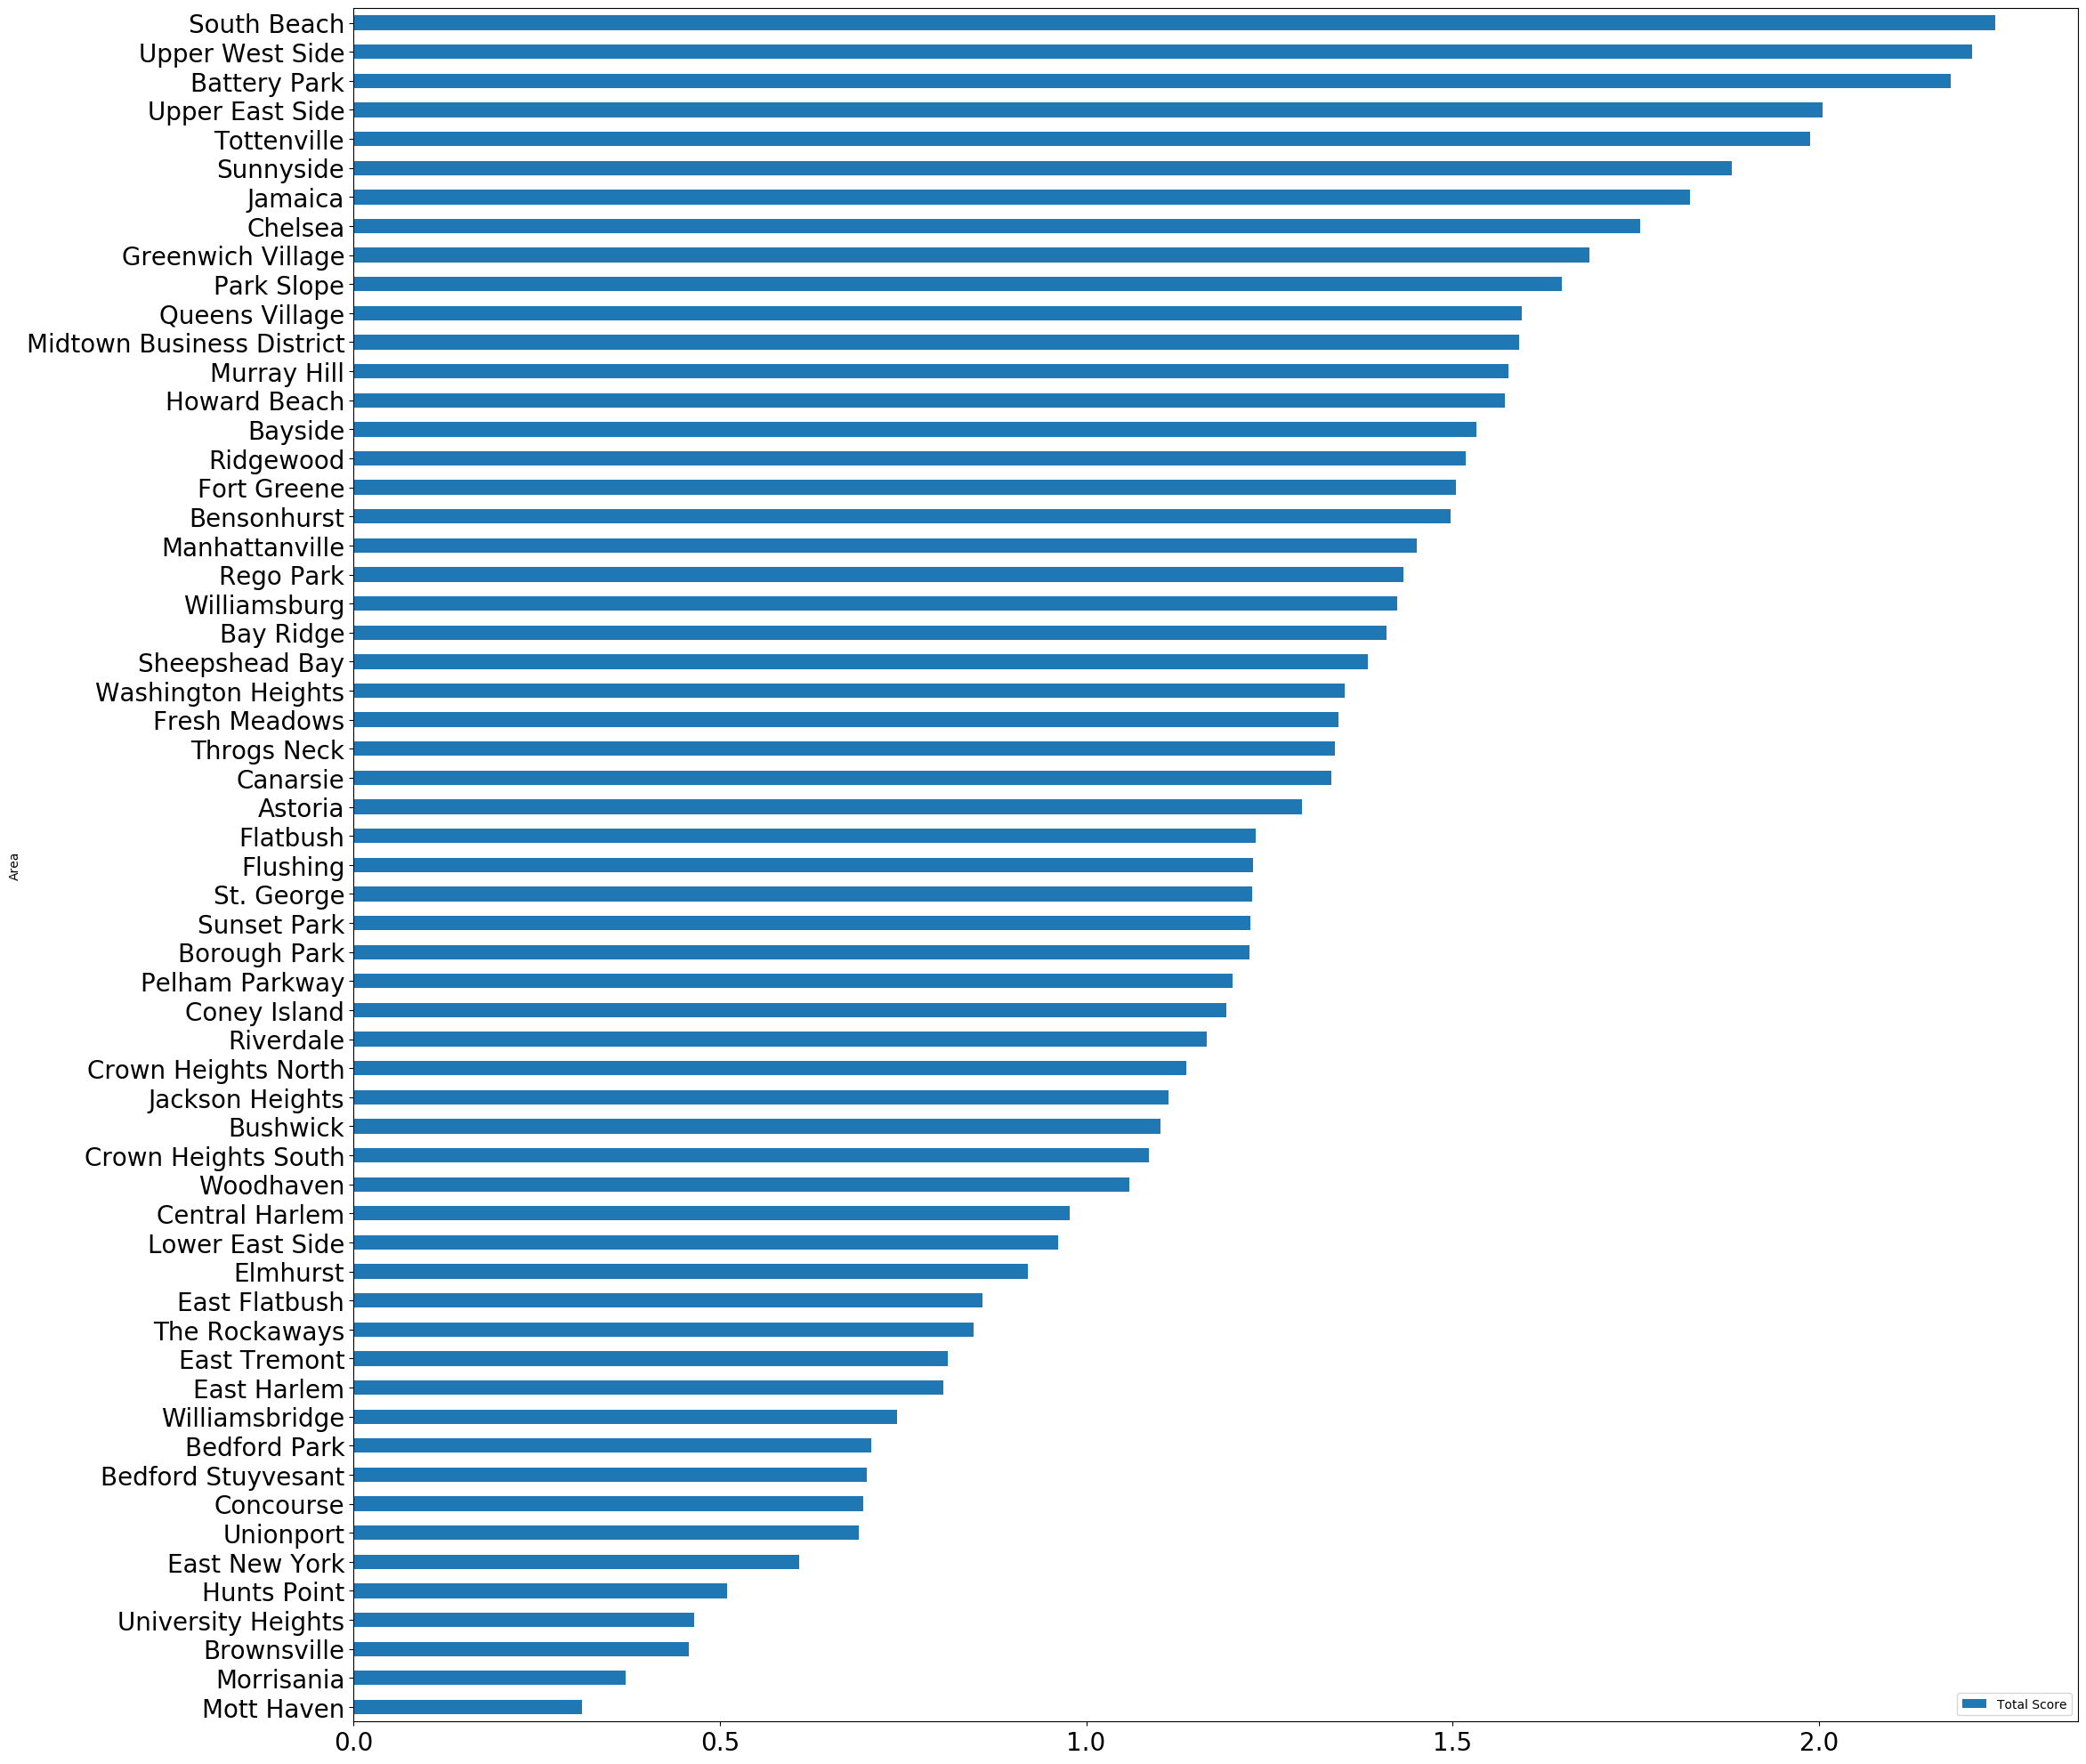

In [142]:
weighted_customer_plot = weighted_customer.sort_values(by="Total Score", ascending=True).copy()
weighted_customer_plot.plot.barh(y="Total Score",  figsize = (25,25),fontsize=20)


In [144]:
weighted_customer.head()

Population    Income  Unemployment in %  Felonies  Trust in %  \
Area                                                                          
Astoria         0.532820  0.364188          -0.157143 -0.347066    0.594186   
Battery Park    0.203282  0.800000          -0.132143 -0.064539    0.569767   
Bay Ridge       0.414674  0.390961          -0.128571 -0.086654    0.602326   
Bayside         0.383355  0.466213          -0.125000 -0.049645    0.700000   
Bedford Park    0.443105  0.185480          -0.350000 -0.397614    0.512791   

              Boutique  Clothing Store  Italian Restaurant     Hotel  Park  \
Area                                                                         
Astoria           -0.0       -0.000000            0.107143  0.000000  0.20   
Battery Park      -0.0       -0.000000            0.035714  0.517241  0.25   
Bay Ridge         -0.0       -0.000000            0.107143  0.000000  0.05   
Bayside           -0.0       -0.000000            0.107143  0.000000  0.05   
Bedford Park      -0.0       -0.078947            0.071429  0.000000  0.30   

              Theater  Art Gallery  Total Score  
Area                                             
Astoria          0.00         0.00     1.294128  
Battery Park     0.00         0.00     2.179324  
Bay Ridge        0.00         0.06     1.409878  
Bayside          0.00         0.00     1.532066  
Bedford Park     0.02         0.00     0.706242

### 4.6 Clustering the customer_weighted df

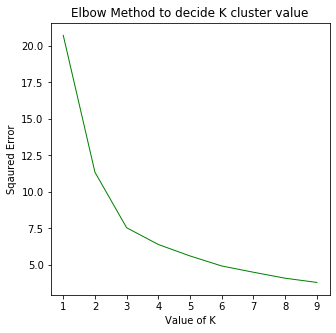

In [154]:
elbow2=[] 
for i in range(1, 10): 
    KM = KMeans(n_clusters=i, max_iter = 100).fit(weighted_customer)
    
      
    # calculates squared error 
    # for the clustered points 
    elbow2.append(KM.inertia_)      
  
# plot the cost against K values 
%matplotlib inline

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 10})
plt.title('Elbow Method to decide K cluster value')
plt.plot(range(1, 10), elbow2, color ='g', linewidth ='1') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.show()

  
# the point of the elbow shape happens to start is the most optimal value for deciding k 

In [155]:
# set number of clusters
kclusters2 = 3

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters2, random_state=0).fit(weighted_customer)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:15]

array([1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1], dtype=int32)

In [156]:
weighted_customer.head()

Population    Income  Unemployment in %  Felonies  Trust in %  \
Area                                                                          
Astoria         0.532820  0.364188          -0.157143 -0.347066    0.594186   
Battery Park    0.203282  0.800000          -0.132143 -0.064539    0.569767   
Bay Ridge       0.414674  0.390961          -0.128571 -0.086654    0.602326   
Bayside         0.383355  0.466213          -0.125000 -0.049645    0.700000   
Bedford Park    0.443105  0.185480          -0.350000 -0.397614    0.512791   

              Boutique  Clothing Store  Italian Restaurant     Hotel  Park  \
Area                                                                         
Astoria           -0.0       -0.000000            0.107143  0.000000  0.20   
Battery Park      -0.0       -0.000000            0.035714  0.517241  0.25   
Bay Ridge         -0.0       -0.000000            0.107143  0.000000  0.05   
Bayside           -0.0       -0.000000            0.107143  0.000000  0.05   
Bedford Park      -0.0       -0.078947            0.071429  0.000000  0.30   

              Theater  Art Gallery  Total Score  
Area                                             
Astoria          0.00         0.00     1.294128  
Battery Park     0.00         0.00     2.179324  
Bay Ridge        0.00         0.06     1.409878  
Bayside          0.00         0.00     1.532066  
Bedford Park     0.02         0.00     0.706242

In [157]:
weighted_customer_cluster = weighted_customer.copy()

In [158]:
# add clustering labels
weighted_customer_cluster.insert(0,"Cluster_Labels", kmeans2.labels_)
weighted_customer_cluster.reset_index(inplace=True)
weighted_customer_cluster.head()

Area  Cluster_Labels  Population    Income  Unemployment in %  \
0       Astoria               1    0.532820  0.364188          -0.157143   
1  Battery Park               0    0.203282  0.800000          -0.132143   
2     Bay Ridge               1    0.414674  0.390961          -0.128571   
3       Bayside               1    0.383355  0.466213          -0.125000   
4  Bedford Park               2    0.443105  0.185480          -0.350000   

   Felonies  Trust in %  Boutique  Clothing Store  Italian Restaurant  \
0 -0.347066    0.594186      -0.0       -0.000000            0.107143   
1 -0.064539    0.569767      -0.0       -0.000000            0.035714   
2 -0.086654    0.602326      -0.0       -0.000000            0.107143   
3 -0.049645    0.700000      -0.0       -0.000000            0.107143   
4 -0.397614    0.512791      -0.0       -0.078947            0.071429   

      Hotel  Park  Theater  Art Gallery  Total Score  
0  0.000000  0.20     0.00         0.00     1.294128  
1  0.517241  0.25     0.00         0.00     2.179324  
2  0.000000  0.05     0.00         0.06     1.409878  
3  0.000000  0.05     0.00         0.00     1.532066  
4  0.000000  0.30     0.02         0.00     0.706242

In [159]:
latlong = pd.read_csv("latlong.csv", sep = ",")
latlong.set_index("Area", inplace = True)
print(latlong.shape)
latlong.head()

(59, 2)


N_lat     N_long
Area                              
Astoria       40.772015 -73.930267
Battery Park  40.703012 -74.015825
Bay Ridge     40.633993 -74.014584
Bayside       40.768435 -73.777077
Bedford Park  40.870100 -73.885691

In [160]:
weighted_customer_cluster.head()
print(weighted_customer_cluster.shape)

(59, 15)


In [161]:
weighted_customer_final = weighted_customer_cluster.merge(latlong, on="Area")
weighted_customer_final["Total Score"]=weighted_customer_final["Total Score"].round(decimals = 2)
weighted_customer_final.head(100)

Area  Cluster_Labels  Population    Income  \
0                     Astoria               1    0.532820  0.364188   
1                Battery Park               0    0.203282  0.800000   
2                   Bay Ridge               1    0.414674  0.390961   
3                     Bayside               1    0.383355  0.466213   
4                Bedford Park               2    0.443105  0.185480   
5          Bedford Stuyvesant               2    0.513762  0.296971   
6                 Bensonhurst               1    0.618865  0.294066   
7                Borough Park               1    0.458957  0.272968   
8                 Brownsville               2    0.404499  0.175215   
9                    Bushwick               1    0.401386  0.288142   
10                   Canarsie               1    0.645945  0.394195   
11             Central Harlem               2    0.484589  0.257617   
12                    Chelsea               0    0.365209  0.545818   
13                  Concourse               2    0.452551  0.180253   
14               Coney Island               1    0.375389  0.214747   
15        Crown Heights North               1    0.451660  0.353756   
16        Crown Heights South               1    0.369126  0.336649   
17              East Flatbush               2    0.450216  0.313656   
18                East Harlem               2    0.366980  0.175792   
19              East New York               2    0.566931  0.223403   
20               East Tremont               2    0.296812  0.142934   
21                   Elmhurst               2    0.497248  0.288174   
22                   Flatbush               1    0.512822  0.335542   
23                   Flushing               1    0.791591  0.287084   
24                Fort Greene               1    0.483046  0.585566   
25              Fresh Meadows               1    0.545220  0.379702   
26          Greenwich Village               0    0.300086  0.800000   
27               Howard Beach               1    0.427052  0.408175   
28                Hunts Point               2    0.197434  0.138933   
29            Jackson Heights               1    0.602096  0.330596   
30                    Jamaica               0    0.800000  0.346838   
31            Lower East Side               2    0.514726  0.261224   
32             Manhattanville               1    0.481711  0.324105   
33  Midtown Business District               0    0.182783  0.545818   
34                 Morrisania               2    0.284315  0.142934   
35                 Mott Haven               2    0.345760  0.138933   
36                Murray Hill               1    0.475557  0.728430   
37                 Park Slope               1    0.385366  0.662271   
38             Pelham Parkway               1    0.413783  0.293877   
39             Queens Village               1    0.621882  0.493590   
40                  Rego Park               1    0.391175  0.439943   
41                  Ridgewood               1    0.617510  0.414320   
42                  Riverdale               1    0.396941  0.294946   
43             Sheepshead Bay               1    0.524016  0.333193   
44                South Beach               0    0.456980  0.488050   
45                 St. George               1    0.578312  0.394989   
46                  Sunnyside               0    0.455380  0.383719   
47                Sunset Park               1    0.440095  0.337264   
48              The Rockaways               2    0.422875  0.327501   
49                Throgs Neck               1    0.394374  0.296755   
50                Tottenville               0    0.541859  0.469167   
51                  Unionport               2    0.605696  0.234753   
52         University Heights               2    0.462806  0.164507   
53            Upper East Side               0    0.677221  0.657152   
54            Upper West Side               0    0.633345  0.657822   
55         Washington Heights               1    

## 5. Results and Discussing <a name="results"></a>
### 5.1 Map the final df

In [227]:
# create map
map_clusters_final = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, score in zip(weighted_customer_final["N_lat"], weighted_customer_final["N_long"], 
                                         weighted_customer_final["Area"], weighted_customer_final["Cluster_Labels"],
                                         weighted_customer_final["Total Score"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ " Score " + str(score), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_final)
       
map_clusters_final

### 5.1.1 List of the final clusters

In [182]:
clusterfinal_df = weighted_customer_final.groupby('Cluster_Labels')['Area'].apply(', '.join)
clusterfinal_df.reset_index().style.hide_index()


### 5.1.2 Final DataFrame as heat df

In [226]:
final = weighted_customer_final.loc[weighted_customer_final['Cluster_Labels'] == 0 ].copy()
final.drop(columns = ["Cluster_Labels", "N_lat", "N_long"], inplace = True)

final = final.sort_values(by=["Total Score"],ascending=False ) #sort by Area for better overview and to compare with other data
final.reset_index(drop = True,inplace=True) #setting new index
final.index.names = ["Index"]
final.style.background_gradient(cmap="Blues", low = 0, high = 0.5)

### 5.1.3 Bar plot with only top 15 Districts

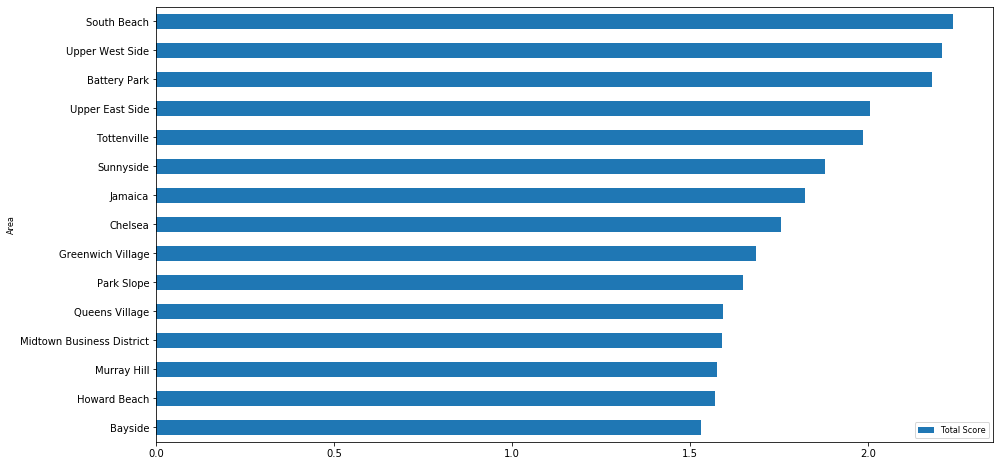

In [257]:
weighted_customer_plot2 = weighted_customer.sort_values(by="Total Score", ascending=False).copy()
weighted_customer_plot2 = weighted_customer_plot2.head(15).sort_values(by="Total Score", ascending=True)
weighted_customer_plot2.plot.barh(y="Total Score",figsize = (15,8),fontsize=10)

### 5.2 Discussion of Results

Our analysis shows that there are several promising districts for the store. Especially South Beach, Upper West Side and Battery Park are high rated. The Distribution of Clothing Stores was the highest in St.George and of Boutiques in Midtown Business District. As you can see from the map the Cluster 0 (red marks) is the best cluster for the requirements of the Customer. This Cluster is mostly located in Manhatten but also got 2 outliners in Staten Island.

South Beach located in Staten Island gained the highest score. There is a high frequency of Italien restaurants and the factor that it is a good place to live with a low Crime Rate compensated the mediocre socio economic data. 

Upper Westside scores with high income, population and parks but there are no hotels which could leads to less touristic customers. On the other hand this is a place where a lot of wealthy people live and the store could benefit from regular customers. It could be a great place to live if the customers prefers to live directly in the city center. The proximity to the Central Park a touristic hot spot could maybe compensate the lack of hotels in the relation of touristic customers.

The Battery Park is a touristig hotspot in New York even though the low population it is in the top 3 ranking. The few People who can afford to live there have a high income furthermore are lots of hotels located there which gurantee for a great mix of tourists and regular customers.

## 6 Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Districts which fits best to the diverse requirements of the customer. By evaluating and quantifying his imaginations with the weighted matrix it was possible to identify several districts which combines his requirement for the store and personal living wishes. In the following the requirements are printed again:

In [259]:
weighted_matrix

Requirement  Weight
0                   high population     0.8
1                       high income     0.8
2                 low unemployment     -0.5
3                    low crime rate    -0.7
4              high communtiy trust     0.7
5          away from other Boutique    -0.3
6   away from other Clothing Stores    -0.3
7      close to Italian Restaurants     0.5
8                   close to Hotels     0.9
9                     close to park     0.5
10                 close to Theater     0.3
11             close to Art Gallery     0.3

The Final decission on the optimal location will be made by the customer based on the final heat map dataframe which visualizes the characteristics of the values of the disctricts and the map which shows the recommended zones and the total score of each district. Furthermore we could do a second analysis if the customer wants to weight the requirements diffrent. The heatmap is perfect to see why which district is ranked up or down and with which intesity the diffrent requirements are weighted.